In [9]:
from pathlib import Path
import os
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

data_path = Path('dataset/boat-types-recognition')

In [29]:
def display_images_from_dataset(dataset_dir, n=5):
    """
    Displays n images from each subfolder in the dataset directory.
    
    :param dataset_dir: Path to the dataset directory.
    :param n: Number of images to display per subfolder.
    """
    # Ensure the dataset directory exists
    if not os.path.isdir(dataset_dir):
        print(f"Directory '{dataset_dir}' does not exist.")
        return

    # Get the list of subfolders
    subfolders = [os.path.join(dataset_dir, d) for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
    
    for subfolder in subfolders:
        # Get the list of image files in the subfolder
        image_files = [os.path.join(subfolder, f) for f in os.listdir(subfolder) if f.endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
        
        num_total_images = len(image_files)
        class_name = os.path.basename(subfolder)
        print(f"Class '{class_name}' has {num_total_images} images.")
        
        # Randomly select n images or take all if there are less than n images
        selected_images = random.sample(image_files, min(n, num_total_images))
        
        # Display the images
        fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
        fig.suptitle(f"Class: {class_name}")
        
        for ax, img_path in zip(axes, selected_images):
            img = mpimg.imread(img_path)
            ax.imshow(img)
            ax.axis('off')
        
        plt.show()

Class 'buoy' has 68 images.


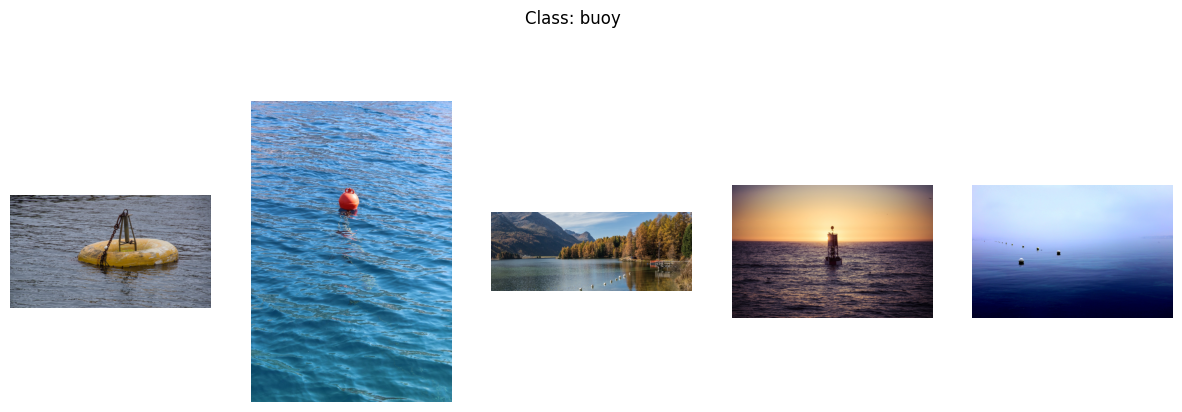

Class 'cruise ship' has 239 images.


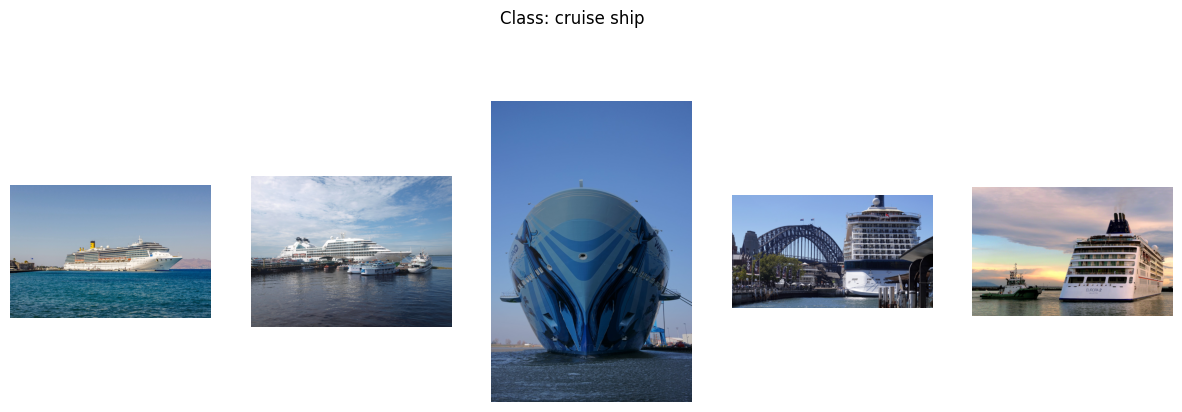

Class 'ferry boat' has 81 images.


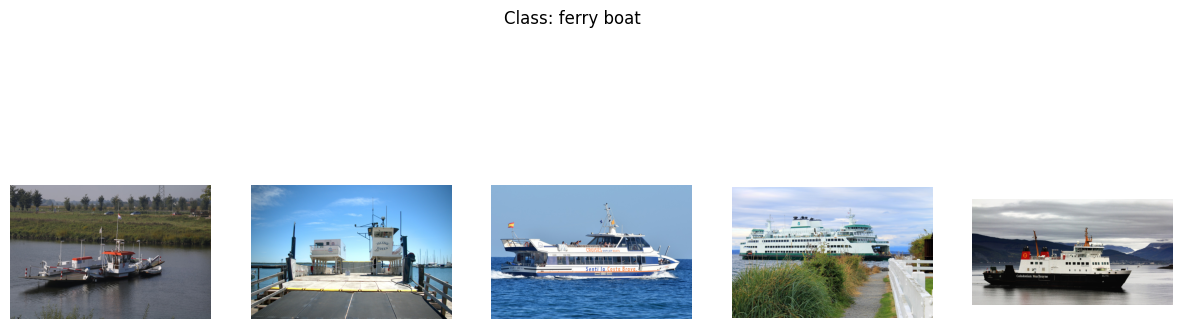

Class 'freight boat' has 29 images.


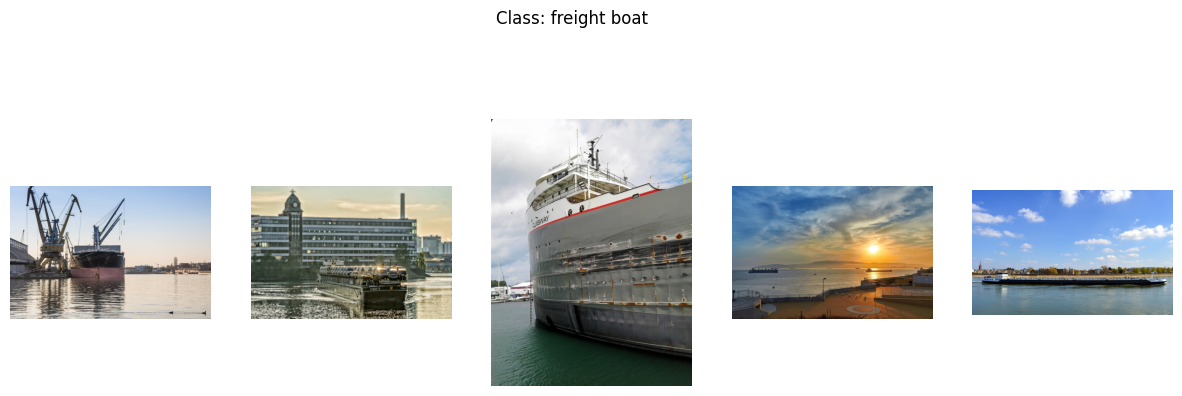

Class 'gondola' has 242 images.


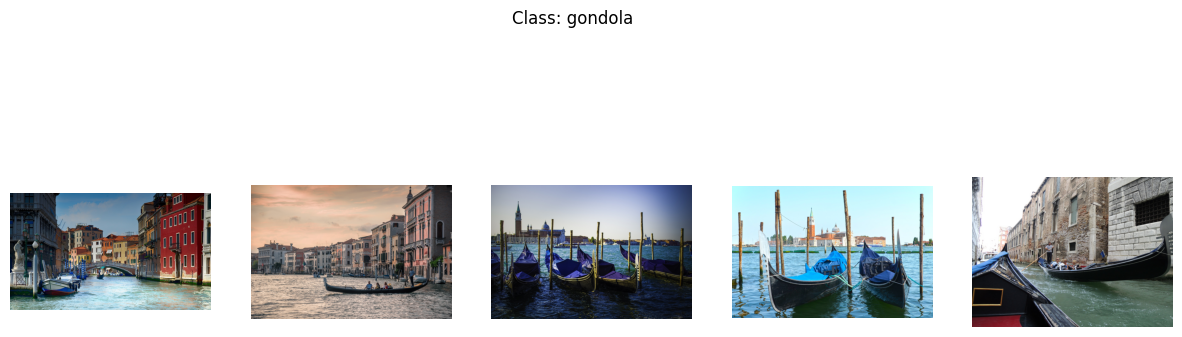

Class 'inflatable boat' has 21 images.


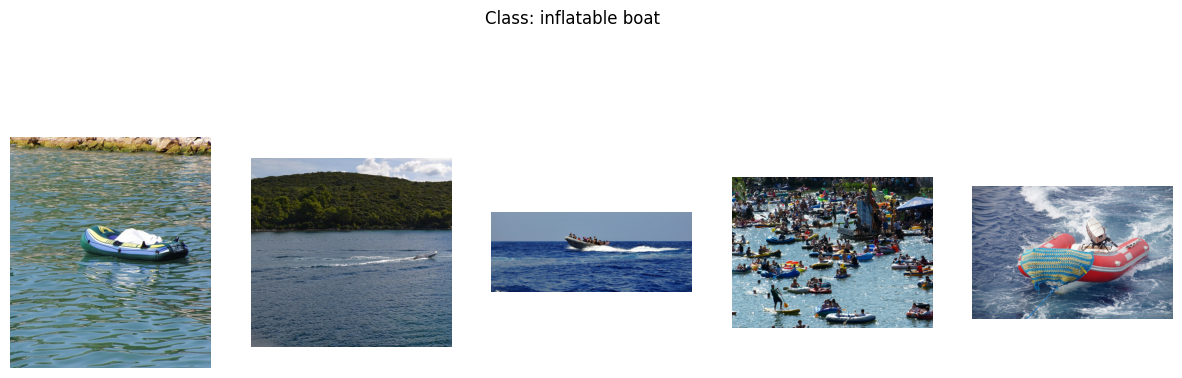

Class 'kayak' has 254 images.


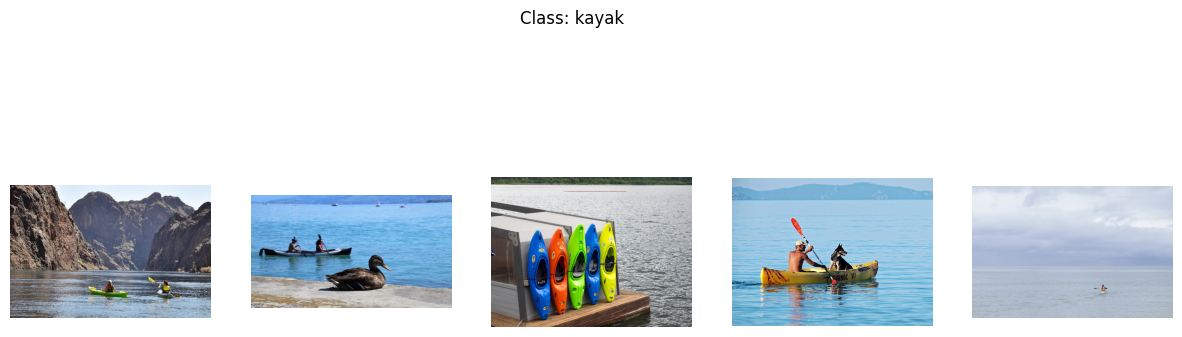

Class 'paper boat' has 40 images.


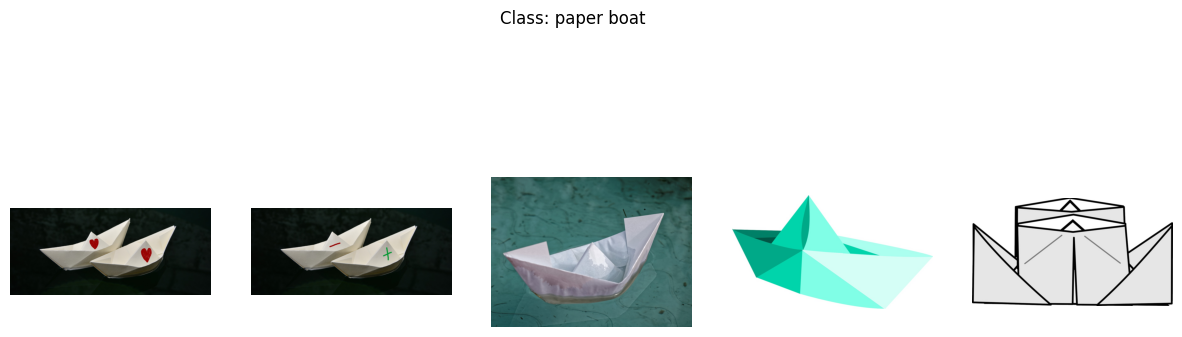

Class 'sailboat' has 488 images.


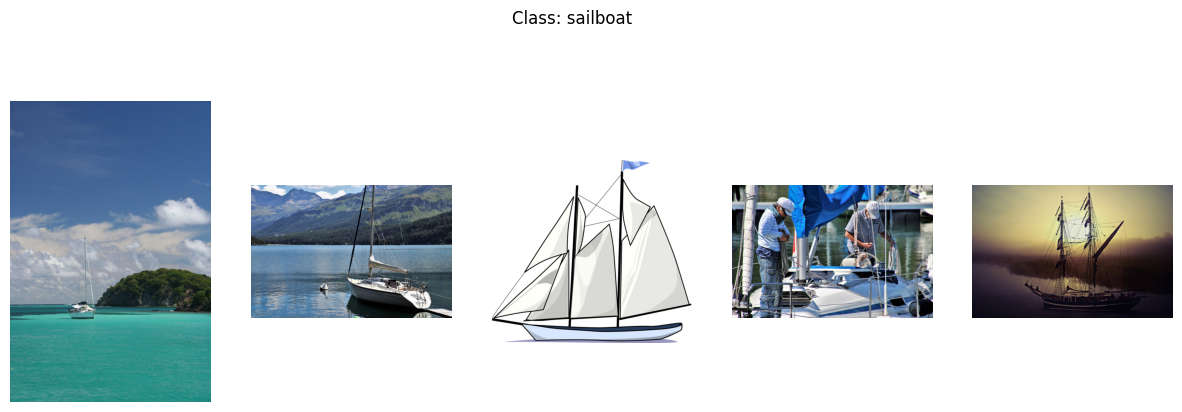

In [31]:
display_images_from_dataset(data_path, n=5) 

In [32]:
classes = [os.path.basename(d) for d in data_path.iterdir() if d.is_dir()]
print(classes)

['buoy', 'cruise ship', 'ferry boat', 'freight boat', 'gondola', 'inflatable boat', 'kayak', 'paper boat', 'sailboat']


Dataset contains different image style domains (artistic, natural image, drawings), some images contain multiple boats, different background sceneries, day-night shifts, front-view vs lateral view, low-contrast images, in different aspect ratios

Total number of images in the dataset: 1462


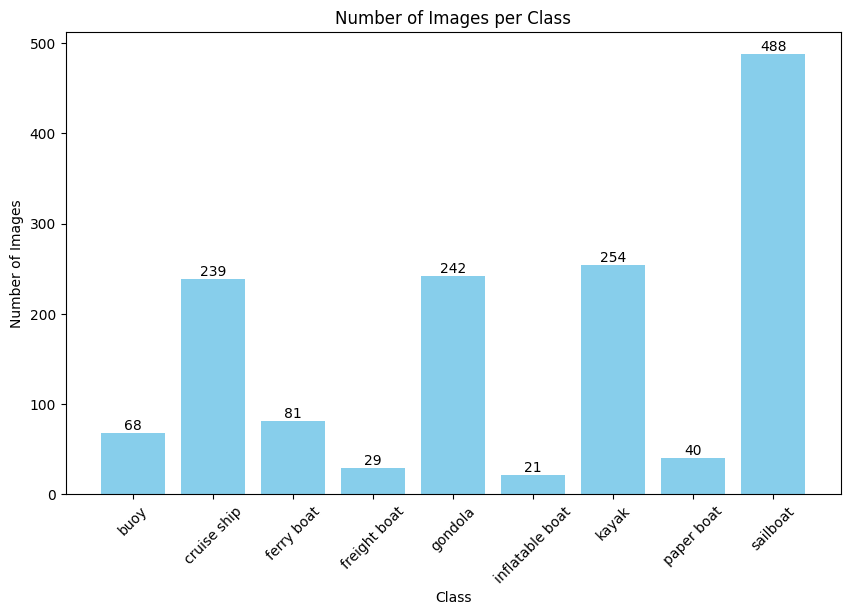

In [27]:
subfolders = [os.path.join(data_path, d) for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

# Store class names and the number of images per class
class_names = []
num_images = []

for subfolder in subfolders:
    image_files = [os.path.join(subfolder, f) for f in os.listdir(subfolder) if f.endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
    
    class_names.append(os.path.basename(subfolder))
    num_images.append(len(image_files))

# Plotting the number of images per class
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, num_images, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, str(height), ha='center', va='bottom')

print(f"Total number of images in the dataset: {sum(num_images)}")
plt.show()

In [33]:
# # prepend class name to each image file to ease labelling process
# for subfolder in subfolders:
#     class_name = os.path.basename(subfolder)
#     image_files = [os.path.join(subfolder, f) for f in os.listdir(subfolder) if f.endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
    
#     for img_path in image_files:
#         new_img_path = os.path.join(subfolder, f"{class_name}_{os.path.basename(img_path)}")
#         os.rename(img_path, new_img_path)